# Webcam mask detection

Now that we have seen the end goal, lets come back & try to dissect & understand it line by line.

This is recognition problem whether person wearing mask or not, this is not an object detection problem (where u put a square box around it).

In [1]:
from tensorflow.keras.models import load_model
import os
import numpy as np

import cv2
import matplotlib.pyplot as plt

from PIL import Image


In [2]:
pip --version

pip 23.2.1 from /Users/sylvia/opt/anaconda3/envs/tf_dl/ComputerVision/lib/python3.8/site-packages/pip (python 3.8)
Note: you may need to restart the kernel to use updated packages.


In [3]:
#! /Users/sylvia/opt/anaconda3/envs/tf_dl/ComputerVision/bin/pip install pygame


In [4]:
#print(cv2.getBuildInformation())


In [5]:
pwd

'/Users/sylvia/Desktop/IITR/M10-CV/Live_lectures'

In [6]:
'''
LOAD MODEL
'''
model = load_model('recognize_mask.h5')


2023-10-01 20:49:34.027967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [8]:
model.input_shape      # Input shape of images while the model was trained

(None, 224, 224, 3)

Here we r capturing only 1 image, array of images can also be created to capture multiple images from the video.

When u exit loop u can get final image saved in frame or u can keep concatenating it into an array, it is also possible in case need to capture multiple images.

In [9]:
# webcam = cv2.VideoCapture(0) #Use camera 0


# while True:
#     (rval, im) = webcam.read()   # rval indicating boolean flag for success/fail read image
#                                  # im for image
#     # Show the image             # If video has motion/movement u can save multiple images
#     cv2.imshow('LIVE',   im)     # Here no movement, its just a face
#     key = cv2.waitKey(10)        # whichever key pressed, save in variable key
#     # if Esc key is pressed then break out of the loop 
#     if key == 27: #The Esc key as cv2 recognises is value 27
#         break

#     frame = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  # by default in opencv BGR, change to RGB  
#                                  # tf, keras require RGB image to make predictions
#         # frame will be an array, whatever image u read in opencv is going to be an array.
#         # Stop video
# webcam.release()

# # Close all started windows
# cv2.destroyAllWindows()

In [10]:
# import cv2

# # Initialize the webcam using AVFoundation backend
# cap = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)

# if not cap.isOpened():
#     print("Error: Could not open camera.")
#     exit()

# # Capture a single frame
# ret, frame = cap.read()

# if ret:
#     # Display the captured frame
#     cv2.imshow('Captured Image', frame)
#     cv2.waitKey(0)  # Wait until a key is pressed

#     # Save the captured frame to a file
#     cv2.imwrite('captured_image.jpg', frame)

# # Release the webcam and close OpenCV windows
# cap.release()
# cv2.destroyAllWindows()



pygame an alternative to open cv to capture image

In [11]:
import pygame
import pygame.camera

pygame.camera.init()

# Get the name of the first available camera
cam_name = pygame.camera.list_cameras()[0]

# Start the camera
cam = pygame.camera.Camera(cam_name, (640, 480))
cam.start()

# Capture an image
img = cam.get_image()

# Save the image to a file
pygame.image.save(img, "captured_image.jpg")

cam.stop()


pygame 2.5.2 (SDL 2.28.3, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


[ WARN:0@2.348] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


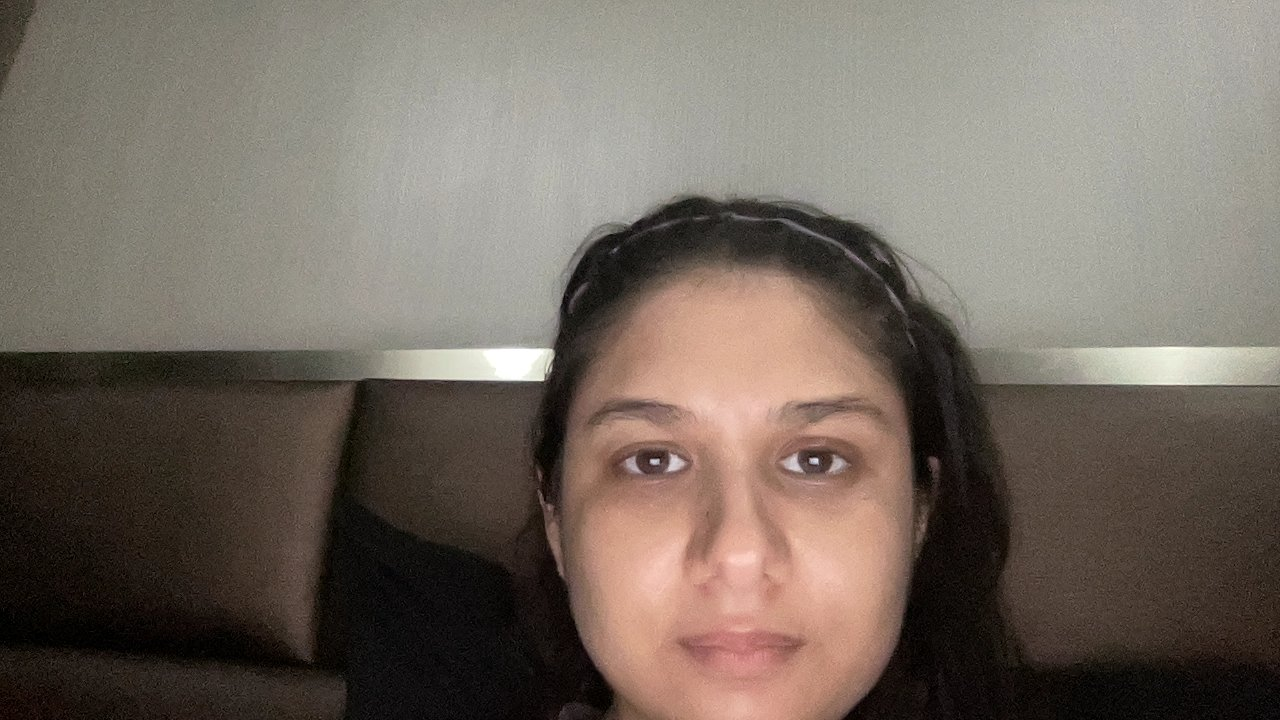

In [12]:
from IPython.display import Image, display

# Display the image
display(Image(filename='captured_image.jpg'))


In [15]:
live_image = cv2.imread("captured_image.jpg")
# Resize the image to the shape expected by the model
resize_image = cv2.resize(live_image, (224, 224))

# Rescale pixel values to the range [0, 1]
img = resize_image.astype('float32') / 255.0

# Add an additional dimension for the batch size
img = img.reshape((1, 224, 224, 3))

prediction = model.predict(img)

# If the output is closer to 1, it belongs to class 1, and if closer to 0, it belongs to class 0.
predicted_class = 1 if prediction >= 0.5 else 0

# Print the predicted class
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 29ms/step
Predicted class: 0


In [16]:
#resize_frame = cv2.resize(frame, (224,224))

In [17]:
# img = resize_frame.astype('float32')
# img /= 255
# img = img.reshape((1,224,224,3))

In [18]:
# img.shape

In [19]:
'''
PREDICTING
'''
 
ret = model.predict(img, batch_size=1) 

1/1 [==============================] - 0s 18ms/step


In [20]:
ret

array([[0.00026967]], dtype=float32)

In [21]:
result=np.around(ret)

In [22]:
result

array([[0.]], dtype=float32)

In [23]:
if result == 1:
    prediction = 'No Mask'
else:
    prediction = 'Mask'
    
prediction

'Mask'

### Putting it all Together as a UDF
    1. capture_video()  -Captures the video and returns the captured image frame as an array
    2. check mask() - uses the frame array returned in previous step, pre-processes it and makes the prediction 

*<font color=blue>This whole works on basic assumption that video is a series of frames & every frame is an image to us. Picking 1 frame out of the video as an image & reusing the trained model to detect whether mask has been worn or not.*

In [24]:
# def capture_video():
#     webcam = cv2.VideoCapture(0) #Use camera 0


#     while True:
#         (rval, im) = webcam.read()
    
#         cv2.imshow('LIVE', im)
#         key = cv2.waitKey(10)
#         # if Esc key is pressed then break out of the loop 
#         if key == 27: #The Esc key
#             break
#         frame = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)       
        
#     # Stop video
#     webcam.release()

#     # Close all started windows
#     cv2.destroyAllWindows()
#     return frame

In [25]:
# def check_mask():
#     frame = capture_video()   # Input video
#     resize_frame = cv2.resize(frame, (224,224))   # Pre-processing
#     img = resize_frame.astype('float32')
#     img /= 255
#     img = img.reshape((1,224,224,3))
#     model = load_model('../19 Face Mask Detection/recognize_mask.h5')  # Load model
#     proba = model.predict(img, batch_size=1, verbose=0)      # Make Predictions
    
#     result=np.around(proba)
    
#     if result == 1:
#         prediction = 'No Mask'
#     else:
#         prediction = 'Mask'
#     return (prediction,frame,proba)

In [26]:
# (prediction,frame,proba) = check_mask()
# image1 = Image.fromarray(frame)
# plt.imshow(image1);
# xlabel_string = prediction + " , proba= "+ str(proba)
# plt.xlabel(xlabel_string);